In [1]:
import coffea
from git import Repo
import awkward as ak
import uproot
mod = "Prayag Yadav"
local_repo = Repo(path='coffea')
local_branch = local_repo.active_branch.name
print("_______________________________________")
print("\tCurrent Configuration")
print("---------------------------------------")
print("Coffea Version: ", coffea.__version__)
print("Branch: \t", local_branch)
print("Modified by: \t", mod)
print("_______________________________________")


_______________________________________
	Current Configuration
---------------------------------------
Coffea Version:  0.1.dev3583+ge06c4b8
Branch: 	 master
Modified by: 	 Prayag Yadav
_______________________________________


In [47]:
from coffea.nanoevents import NanoEventsFactory, FCC
test_file = '../../../coffea-fcc-analyses/data/p8_ee_ZH_ecm240/events_082532938.root'
file = uproot.open(test_file)

events = NanoEventsFactory.from_root(
    test_file+":events",
    # entry_stop=10000,
    schemaclass= FCC.get_schema(version="latest"),
    delayed = False,
    metadata=file["metadata"].arrays()
).events()

file.close()

In [48]:
isolated_muons = events.ReconstructedParticles.match_collection(events.Muonidx0)
muons = events.ReconstructedParticles.match_collection(events.AllMuonidx0)

In [49]:
def delta_r(a,b):
    comb = ak.cartesian([a,b])
    l,m = ak.unzip(comb)
    return ((l.phi-m.phi)**2 + (l.eta-m.eta)**2)**0.5

In [65]:
dr_muons = delta_r(muons, events.ReconstructedParticles)
dr_muons = dr_muons[dr_muons != 0] #Remove the contribution from muons themselves
dr_isolated_muons = delta_r(isolated_muons, events.ReconstructedParticles)
dr_isolated_muons = dr_isolated_muons[dr_isolated_muons != 0] #Remove the contribution from isolated_muons themselves

In [66]:
import matplotlib.pyplot as plt
import hist
import mplhep as hep

In [71]:
m_hist = hist.Hist.new.Reg(100,0,8).Double().fill(ak.flatten(dr_muons))
iso_m_hist = hist.Hist.new.Reg(100,0,8).Double().fill(ak.flatten(dr_isolated_muons))

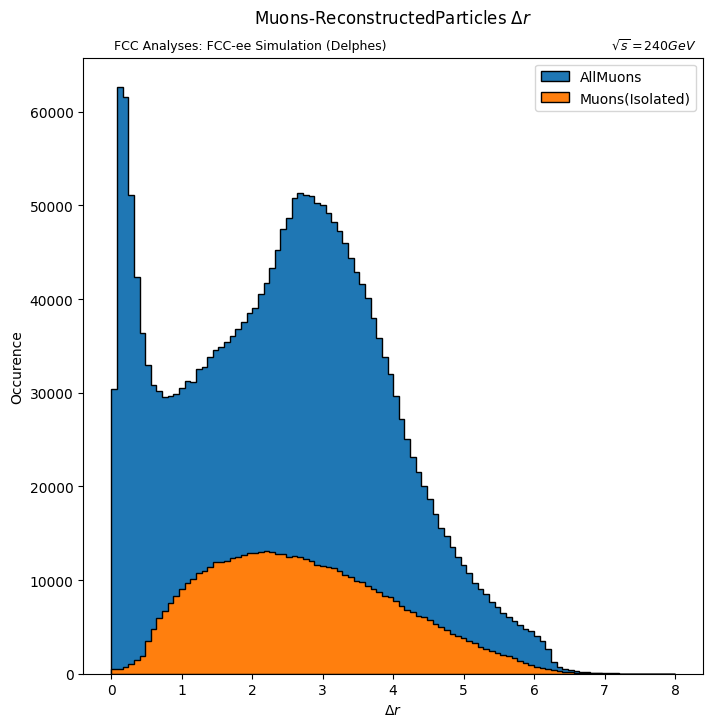

In [80]:
fig, ax = plt.subplots(figsize=(8,8))
energy = 240
hep.histplot(
    [m_hist,iso_m_hist],
    label=['AllMuons','Muons(Isolated)'],
    histtype='fill',
    edgecolor='black',
    linewidth=1,
    yerr=0,
    ax=ax
)
ax.set_xlabel('$\\Delta r$')
ax.set_ylabel('Occurence')
ax.set_title('Muons-ReconstructedParticles $\\Delta r$',pad=25)
ax.text(0.27, 1.02, 'FCC Analyses: FCC-ee Simulation (Delphes)', fontsize=9, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.92, 1.02, f'$\\sqrt{{s}} = {energy} GeV$', fontsize=9, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.legend()
# fig.savefig('Muons_ReconstructedParticles_DeltaR.png', dpi=240)

In [90]:
m_pt = muons.pt
m_pt_hist =  hist.Hist.new.Reg(100,0,20).Double().fill(ak.flatten(m_pt))

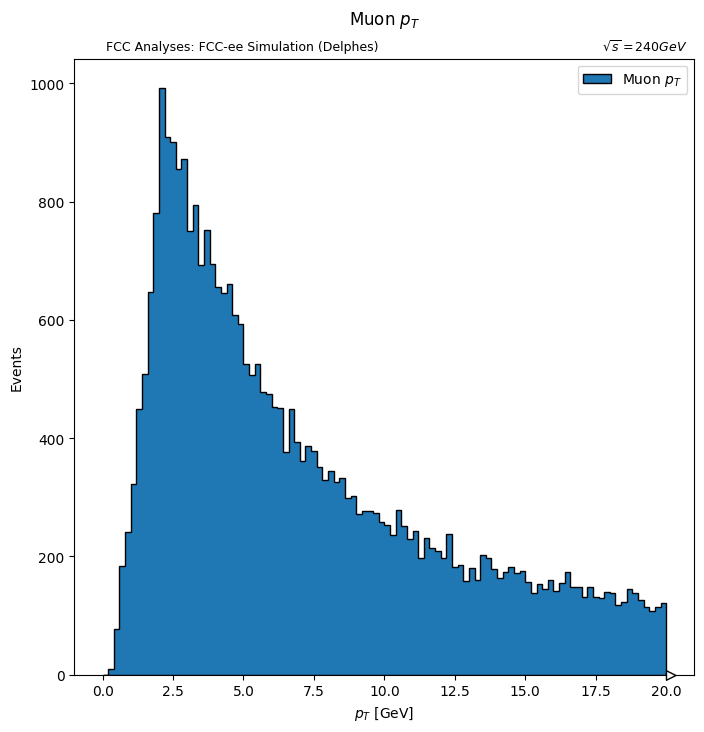

In [91]:
fig, ax = plt.subplots(figsize=(8,8))
energy = 240
hep.histplot(
    m_pt_hist,
    label='Muon $p_T$',
    histtype='fill',
    edgecolor='black',
    linewidth=1,
    yerr=0,
    ax=ax
)
ax.set_xlabel('$p_T$ [GeV]')
ax.set_ylabel('Events')
ax.set_title('Muon $ p_T$',pad=25)
ax.text(0.27, 1.02, 'FCC Analyses: FCC-ee Simulation (Delphes)', fontsize=9, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.text(0.92, 1.02, f'$\\sqrt{{s}} = {energy} GeV$', fontsize=9, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.legend()
# fig.savefig('Muon_pt.png', dpi=240)